LLS

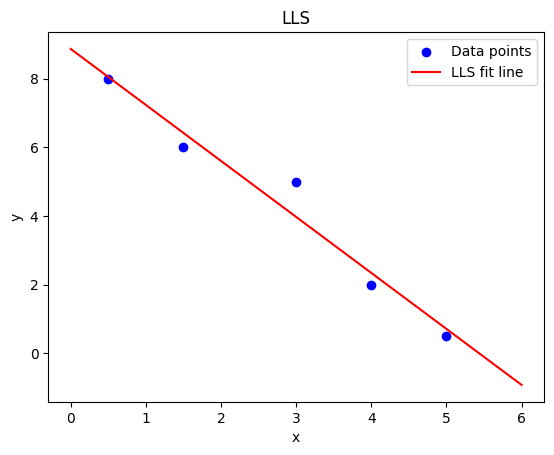

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[0.5, 8.0], [1.5, 6.0], [3.0, 5.0], [4.0, 2.0], [5.0, 0.5]])
X = data[:, 0]  # Inputs
y = data[:, 1]  # Outputs

X_b = np.c_[np.ones((len(X), 1)), X]

# lls function
def lls_solution(X_b, y):
    # w = (X.T * X)^-1 * X.T * y
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

# Solve
theta_best = lls_solution(X_b, y)

# Plotting the LLS solution
def plot_solution(X, y, theta_best):
    plt.scatter(X, y, color='blue', label='Data points')
    X_new = np.linspace(0, 6, 100)
    X_new_b = np.c_[np.ones((100, 1)), X_new]
    y_predict = X_new_b.dot(theta_best)
    plt.plot(X_new, y_predict, 'r-', label='LLS fit line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('LLS')
    plt.show()

plot_solution(X, y, theta_best)

LMS

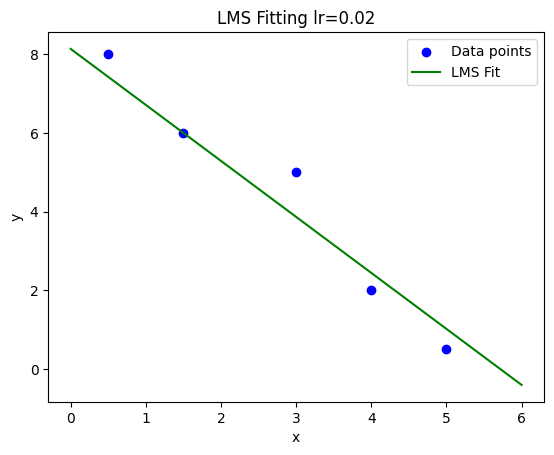

In [13]:
def lms_algorithm(X, y, eta=0.02, epochs=100):
    np.random.seed(42)
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2)
    weight_trajectory = [theta.copy()]

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index]
            error = yi - xi.dot(theta)
            theta += eta * xi.T.dot(error)
        weight_trajectory.append(theta.copy())
    
    return theta, weight_trajectory

# Run LMS algorithm with eta=0.02 and 100 epochs
theta_lms, weight_trajectory = lms_algorithm(X, y)

# Plotting LMS result and weight trajectories
def plot_lms_result(X, y, theta_lms, eta):
    plt.scatter(X, y, color='blue', label='Data points')
    X_new = np.linspace(0, 6, 100)
    X_new_b = np.c_[np.ones((100, 1)), X_new]
    y_predict = X_new_b.dot(theta_lms)
    plt.plot(X_new, y_predict, 'g-', label='LMS Fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('LMS Fitting lr=' + str(eta))
    plt.show()

plot_lms_result(X, y, theta_lms, eta=0.02)

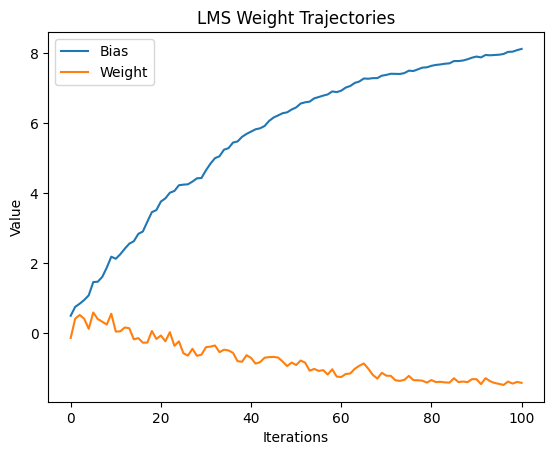

In [14]:
# Plot weight trajectories
def plot_weight_trajectories(weight_trajectory):
    weight_trajectory = np.array(weight_trajectory)
    plt.plot(weight_trajectory[:, 0], label='Bias')
    plt.plot(weight_trajectory[:, 1], label='Weight')
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    plt.legend()
    plt.title('LMS Weight Trajectories')
    plt.show()

plot_weight_trajectories(weight_trajectory)


Learning Rate: 0.001


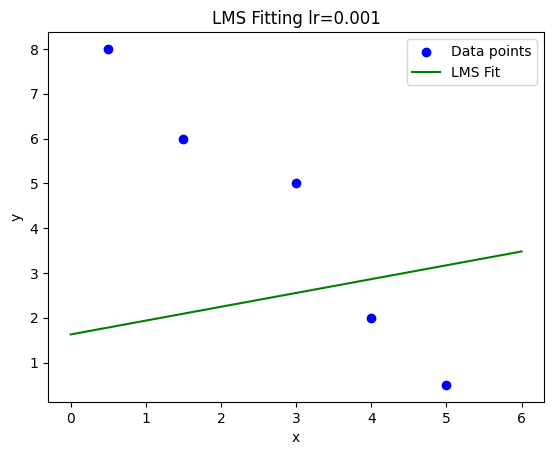

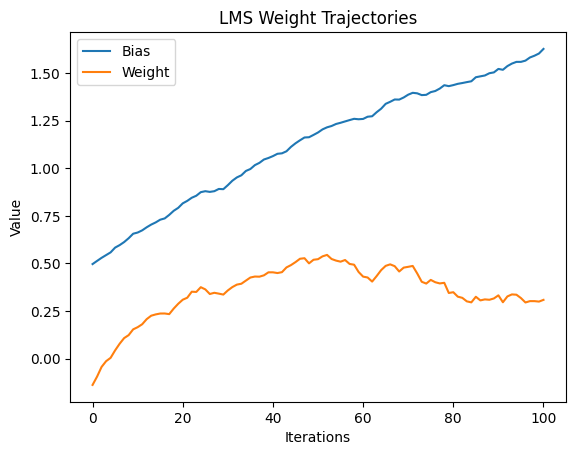


Learning Rate: 0.1


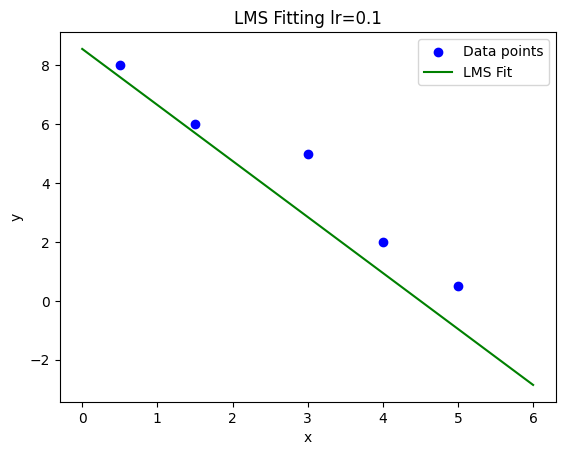

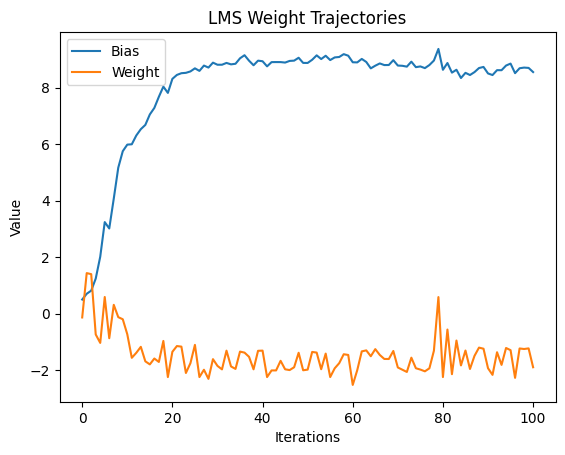


Learning Rate: 0.5


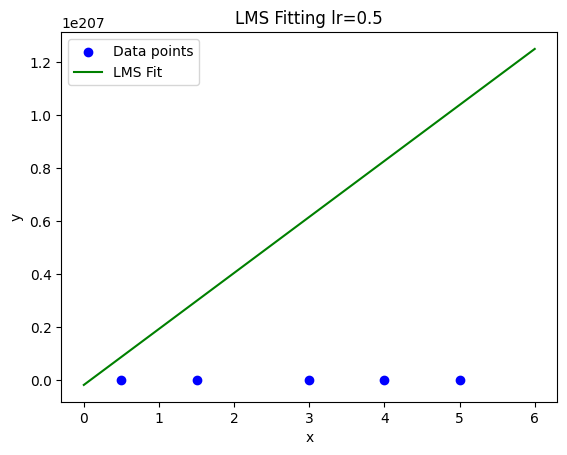

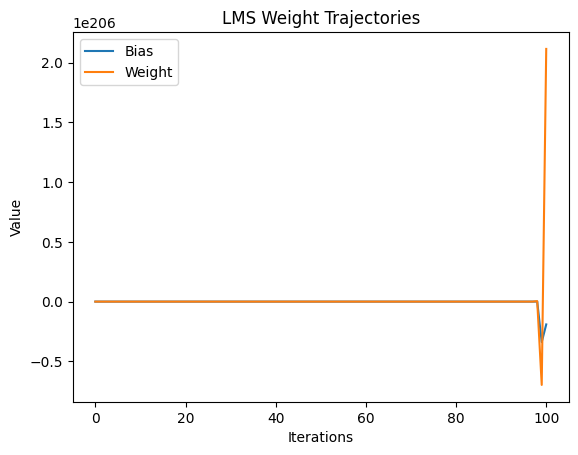

In [17]:
learning_rates = [0.001, 0.1, 0.5]

def lms_with_different_rates(X, y, learning_rates):
    for eta in learning_rates:
        theta_lms, weight_trajectory = lms_algorithm(X, y, eta=eta)
        print(f"\nLearning Rate: {eta}")
        plot_lms_result(X, y, theta_lms, eta)
        plot_weight_trajectories(weight_trajectory)

lms_with_different_rates(X, y, learning_rates)